### Xem xét việc có được vào trường đại học hay không dựa trên bộ dữ liệu sinh viên 400 mẫu có tên là binary.csv
Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Logistic Regression để thực hiện việc xác định có được vào trường đại học hay không dựa vào các thông tin như: gre, gpa, rank.
#### Áp dụng thuật toán LLE để trực quan hóa dữ liệu với 2 thành phần thay vì 3 thành phần. Xem xét việc scale dữ liệu???
#### Chạy lại thuật toán Logistic Regression cho dữ liệu đã giảm chiều và kiểm chứng lại kết quả? So sánh với kết quả ban đầu để quyết định có giảm chiều cho bài toán này hay không?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pylab import scatter, show, legend, xlabel, ylabel

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
data = pd.read_csv("../../Data/binary.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [4]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
X = data[['gre', 'gpa', 'rank']]
X.head(3)

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1


In [7]:
X.corr()

,gre,gpa,rank
gre,1.000000,0.384266,-0.123447
gpa,0.384266,1.000000,-0.057461
rank,-0.123447,-0.057461,1.000000


In [8]:
Y = data[['admit']]
Y.head(3)

,admit
0,0
1,1
2,1


### Trực quan hóa dữ liệu

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
types = np.reshape(Y.values, -1)

Text(0.5, 0.92, 'Admit to University')

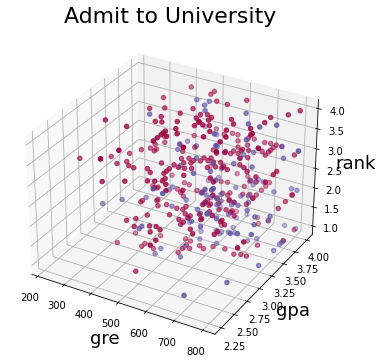

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X['gre'], X['gpa'], X['rank'], c=types, cmap=plt.cm.Spectral)
ax.set_xlabel("gre", fontsize=18)
ax.set_ylabel("gpa", fontsize=18)
ax.set_zlabel("rank", fontsize=18)
ax.set_title("Admit to University", fontsize=22)

In [12]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X_scaler = scaler.transform(X)

In [13]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [14]:
X_reduced = lle.fit_transform(X_scaler)

In [15]:
X_reduced[:3]

array([[-0.00559852, -0.04326518],
       [-0.04322787,  0.02356852],
       [ 0.03852114,  0.13080665]])

In [16]:
lle.eigen_solver

'auto'

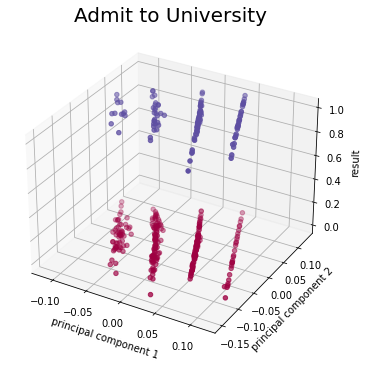

In [17]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], types,
c=types, cmap=plt.cm.Spectral)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('result')
ax.set_title('Admit to University', fontsize =20)
plt.show()

In [18]:
lle_r = pd.DataFrame(data = X_reduced, columns = ['c1', 'c2'])

In [19]:
lle_r = pd.concat([lle_r, Y], axis = 1)
lle_r.head(3)

,c1,c2,admit
0,-0.005599,-0.043265,0
1,-0.043228,0.023569,1
2,0.038521,0.130807,1


### Explaining dataset with 2 main components (LLE)

In [20]:
lle_r = lle_r.join(X)

In [21]:
lle_r.head(3)

,c1,c2,admit,gre,gpa,rank
0,-0.005599,-0.043265,0,380,3.61,3
1,-0.043228,0.023569,1,660,3.67,3
2,0.038521,0.130807,1,800,4.00,1


In [22]:
lle

LocallyLinearEmbedding(n_neighbors=10)